# 02 - Regressão Linear

Na aula passada vimos a primeira tarefa de aprendizagem de máquina: classificação. A classificação é um tipo de algoritmos supervisionados (ou preditivo). Basiccamente um algoritmo supervisionado é uma função que, dado um conjunto de exemplos rotulaados, constrói um *preditor*. Os rótulos atribuídos aos exemplos são definidos a partir de um domínio conhecido. Se este domínio for um conjunto de valores nominais, estamos lidando com um problema de *classificação*. Agora se este domínio for um conjunto infinito e ordenado de valores, passamos a lidar com  um problema de *regressão*. O preditor construído recebe nomes distintos a depender da tarefa. Chamamos de classificador (para o primeiro tipo de rótulo) ou regressor (para o segundo tipo).

Um classificador (ou regressor) também é uma função que recebe um exemplo não rotulado e é capaz de definir um rótulo dentro dos valores possíveis. Se estivermos trabalhando com um problema de regressão este rótulo está dentro do intervalo real assumido no problema. Se for uma tarefa de classificação, esse rótulo é uma das classes definidas.

Podemos definir formalmente da seguinte maneira, segundo (FACELI, et. al, 2011):

*Uma definição formal seria, dado um conjunto de observações de pares $D=\{(x_i, f(x_i)), i = 1, ..., n\}$, em que $f$ representa uma função desconhecida, um algoritmo de AM preditivo (ou supervisionado) aprende uma aproximação $f'$ da função desconhecida $f$. Essa função aproximada, $f'$, permite estimar o valor de $f$ para novas observações de $x$.*

Temos duas situações para $f$:

* **Classificação:** $y_i = f(x_i) \in \{c_1,...,c_m\}$, ou seja, $f(x_i)$ assume valores em um conjunto discreto, não ordenado;
* **Regressão:** $y_i = f(x_i) \in R$, ou seja, $f(x_i)$ assume valores em um cojunto infinito e ordenado de valores.

A imagem a seguir mostra a diferença básica entre os dois métodos: 


## Aplicando Regressão Linear

Vamos mostrar como a regressão funciona através de um método denominado regressão linear. Esse tutorial é baseado em 3 materiais: 

* Tutorial de Regressão Linear: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb por 
* Slides sobre Regressão Linear: http://pt.slideshare.net/perone/intro-ml-slides20min
* Cap. 3 do Livro "An Introduction to Statistical Learning" disponível em: http://www-bcf.usc.edu/~gareth/ISL/
* Livro "Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina" disponível em: https://www.amazon.com.br/dp/8521618808/ref=cm_sw_r_tw_dp_x_MiGdybV5B9TTT

Para o nosso trabalho, vamos trabalhar com a base de *Advertasing* disponibilizada pelo livro "An Introduction to Statistical Learning". Essa base consiste de 3 atributos que representam os gastos de propaganda de um determinado produto na TV, Rádio e Jornal. Além disso, é conhecido a quantidade de vendas realizadas para cada instância. Vamos explorar a base de ados a seguir:

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


#read dataset

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


O *dataset* possui 3 atributos: *TV*, *Radio* e *Newspaper*. Cada um deles corresponde a quantidade de dólares gastos em propaganda em cada uma das mídias para um produto específico. Já a responsta (*Sales*) consiste da quantidade de produtos vendidos para cada produto. Esse *dataset* possui 200 instâncias.

Para melhor visualizar, vamos plotar as informações da base de dados.

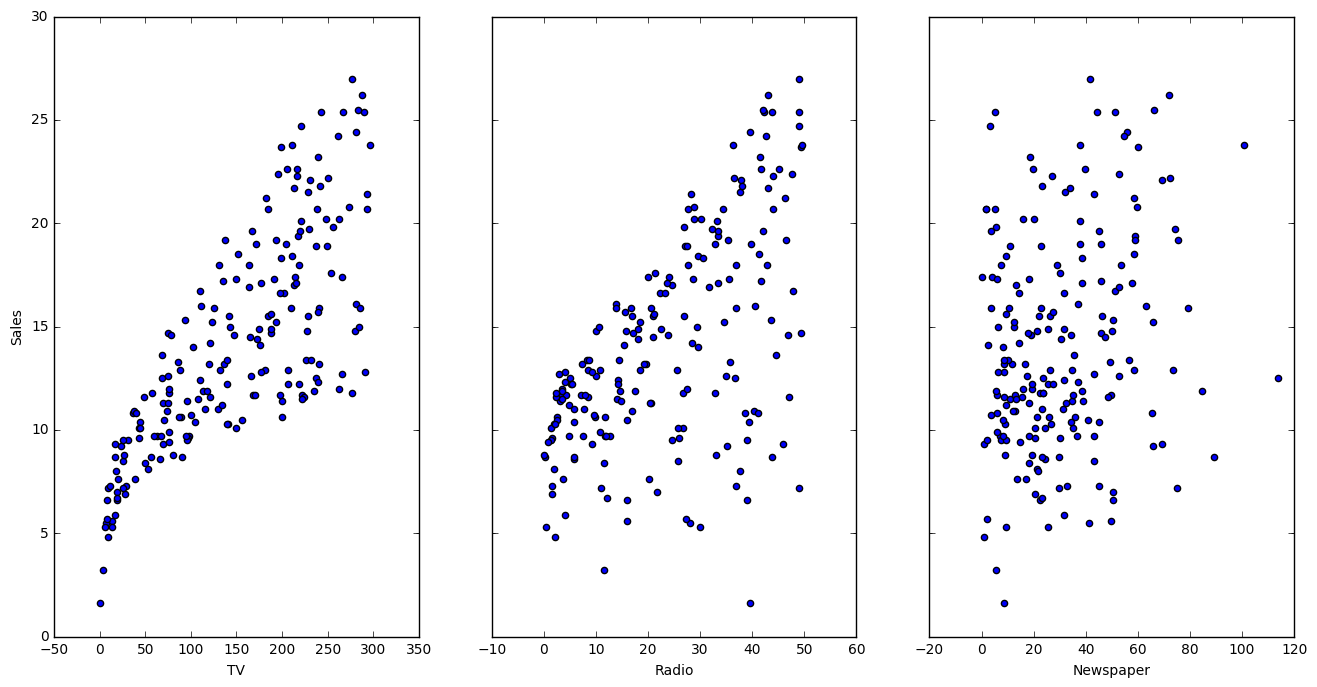

In [2]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

O nosso objetivo é poder analisar os dados e tirar certas conclusões a partir deles. Basicamente, queremos responder as seguintes perguntas:

*** Com base nestes dados, como poderíamos gastar o dinheiro ddesignado para propaganda no futuro? ***

Em outras palavras:

* *Existe uma relação entre o dinheiro gasto em propaganda e a quantidade de vendas?*
* *Quão forte é esse relacionamento?*
* *Quais são os tipos de propaganda que contribuem para as vendas?*
* *Qual o efeito de cada tipo de propaganda nas vendas?*
* *Dado um gasto específico em propaganda, é possível prever quando será vendido?*

Para explorar essas e outras questões, vamos discutir sobre **Regressão Linear Simples**.


### Regressão Linear Simples

Como o próprio nome diz, a regressão linear simples é um método muito (muito++) simples para prever valores **(Y)** a partir de uma única variável **(X)**. Para este modelo, é assumido que exisite uma aproximação linear entre X e Y. Matematicamente, podeos escrever este relacionamento a partir da seguinte função: 

$Y ≈ \beta_0 + \beta_1X$, onde $≈$ pode ser lido como *aproximadamente*.

$\beta_0$ e $\beta_1$ são duas constantes desconhecidas que representam a intercepção da reta com o eixo vertical ($\beta_0$) e o declive (coeficiente angular) da reta ($\beta_1$). As duas constantes são conhecidas como coeficientes ou parâmetros do modelo. O propósito da regressão linear é utilizar o conjunto de dados conhecidos para estimar os valores destas duas variáveis e definir o modelo aproximado:

$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$,

onde $\hat{y}$ indica um valor estimado de $Y$ baseado em $X = x$. Com essa equação podemo prever, por exemplo, as vendas de um determinado produto baseado em um gasto específico em propaganda na TV.

Mas como podemos estimar estes valores?

### Estimando Valores

Na prática, $\beta_0$ e $\beta_1$ são desconhecidos. Para que a gente possa fazer as estimativas precisamos conhecer os valore destes atributos. Para isso, vamos utilizar os dados já conhecidos.

Considere,

$(x_1,y_1), (x_2,y_2), ..., (x_n, y_n)$ $n$ pares de instâncias observadas em um conjunto de dados. O primeiro valor consiste de uma observação de $X$ e o segundo de $Y$. Na base de propagandas, esses dados consistem dos 200 valores vistos anteriormente.

O objetivo na construção do modelo de progração linear é estimar os valores de $\beta_0$ e $\beta_1$ tal que o modelo linear encontrado represente da melhor foma os dados disponibilizados. Em outras palavras, queremos encontrar os valores dos coenficientes de forma que a reta resultante seja o mais próximo possível dos dados utilizadados. 

Basicamente, vamos encontrar várias retas e analisar quais delas se aproxima mais dos dados apresentados. Existe várias maneiras de medir essa "proximidade". No nosso estudo, vamos utilizar a RSS (*residual sum of squares*), que é representada pela equação:

$\sum_{i=1}^{N}{(\hat{y_i}-y_i)^2}$, onde $\hat{y_i}$ o valor estimado de y e $y_i$, o valor real.

A figura a seguir mostra um exemplo dos dados de uma base de dados, os valores estimados e a diferença residual.

![alt Grafico Regressao Linear](https://dl.dropboxusercontent.com/u/25405260/d2l/material_ia/grafico_regressao_linear1.png "Regressão Linear")

Os pontos vermenlhos representam os dados observados; a linha azul, o modelo construído e as linhas cinzas, a diferença residual entre o que foi estimado e o que era real.

Vamos estimar tais parâmetros utilizando *scikit-learn*.

In [3]:
#Warning for Mac OS
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#reading dataset
feature_cols = ['TV']

X = data[feature_cols]
y = data.Sales

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

#Imprimindo beta_0
print("Valor de Beta_0: " + str(lm.intercept_))

#Imprimindo beta_1
print("Valor de Beta_1: " + str(lm.coef_[0]))

Valor de Beta_0: 7.03259354913
Valor de Beta_1: 0.047536640433


Esse valores representam os valores de $\beta_0$ e $\beta_1$ da nossa equação. Como dito anteriormente, estamos trabalhando com um modelo simples de regressão linear onde é levado em consideração somente um atributo. 

Com esses valores é possível estimar quanto será vendido para um determinado gasto em propaganda de TV. Além disso, o coeficiente $\beta_1$ nos conta mais sobre o problema. 

O valor de $0.047536640433$ indica que cada unidade que aumentamos em propaganda de TV implica em um aumento de $0.047536640433$ nas vendas. Em outras palavras, cada $1,000 gastos em TV está associado com um aumento de 47.537 de unidades nas vendas. 

Vamos usar esses valores para estimar quanto será vendido se gastarmos $50,000 em TV.

$y = 7.03259354913 + 0.047536640433 \times 50$



In [4]:
7.03259354913+0.047536640433*50

9.40942557078

Desta forma, poderíamos prever a venda de 9409 unidades.

No entanto, nosso objetivo não é fazer isso manualmente. A idéia é construir o modelo e utiliza-lo para fazer a estimativa de valores.

In [5]:
lm.predict([[50]])

array([ 9.40942557])

Vamos visualizar melhor o modelo construído.

In [6]:
#Fazendo predição para todos os valores de X conhecidos

#Pegando o menor e maior valor de X
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [7]:
#Realizando a predição para estes valores
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

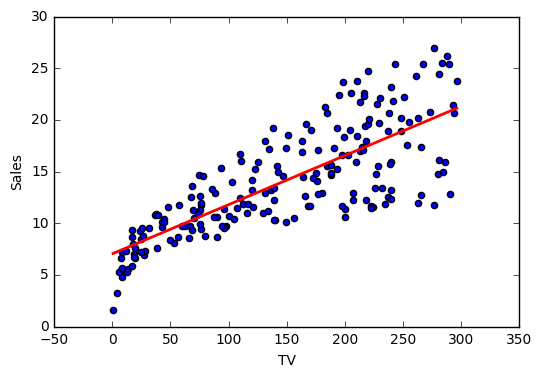

In [8]:
#Plotando os valores

data.plot(kind='scatter', x='TV', y='Sales')

plt.plot(X_new, preds, c='red', linewidth=2)

### Avaliando o Modelo Construído

Para avaliar o modelo construído vamos utilizar uma métrica denominada de $R^2$ (*R-squared* ou coeficiente de determinação). 

(By [Wikipedia](https://pt.wikipedia.org/wiki/R%C2%B2)) 
*O coeficiente de determinação, também chamado de R², é uma medida de ajustamento de um modelo estatístico linear generalizado, como a Regressão linear, em relação aos valores observados. O R² varia entre 0 e 1, indicando, em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior o R², mais explicativo é modelo, melhor ele se ajusta à amostra. Por exemplo, se o R² de um modelo é 0,8234, isto significa que 82,34\% da variável dependente consegue ser explicada pelos regressores presentes no modelo.*

Para entender melhor a métrica, vamos analisar o gráfico a seguir:
![alt Grafico R-squared](https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_r_squared.png "R-squared")

Observe que a função representada pela cor vemelha representa melhor os dados do que a reta de cor azul, por exemplo.

Vamos calcular o valor do *R-squared* para o modelo construído


In [9]:
#Calcula o R-squared
lm.score(X, y)

0.61187505085007099

Sozinho esse valor não nos conta muito. No entanto, na comparação de modelos ele é útil.

### Multiple Linear Regression

Podemos estender o modelo visto anteriormente para trabalhar com mais de um atributo, a chamada *regressão lienear multípla* (tradução livre). Matematicamente, teríamos:

$y = \beta_0 + \beta_1 x_1 + ... \beta_n x_n$

Cada $x$ representa um atribuito e cada atributo possui seu próprio coeficiente. Para nossa base de dados, teríamos:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Vamos construir nosso modelo para este caso:

In [10]:
#Warning for Mac OS
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#reading dataset
feature_cols = ['TV','Radio','Newspaper']

X = data[feature_cols]
y = data.Sales

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

#Imprimindo beta_0
print("Valor de Beta_0: " + str(lm.intercept_))
print
#Imprimindo beta_1
print("Valores de Beta_1: ")
zip(feature_cols, lm.coef_)


Valor de Beta_0: 2.93888936946

Valores de Beta_1: 


[('TV', 0.045764645455397601),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424762578)]

Podemos usar o modelo para estimar valores:

In [11]:
lm.predict([[100, 25, 25]])

array([ 12.20266701])

Calculando o R-squared

In [12]:
lm.score(X, y)

0.89721063817895208

## Entendendo os resultados obtidos

Vamos analisar alguns resultados obtidos nos dois modelos construídos anteriormente. A primeira coisa é verificar o valor de $\beta_1$. Esse valor deu positivo para os atributos *TV* e *Radio* e negativo para o atributo *Newspaper*. Isso significa que o gasto em propaganda está relacionado positivamente às vendas nos dois primeiros atributos. Diferente do que acontece com o *Newspaper* está negativamente associado às vendas. 

Uma outra coisa que podemos perceber é que o *R-squared* aumentou quando aumentamos o número de atributos. Isso normalmente acontece com essa métrica. Basicamente, podemos concluir que este último modelo tem um valor mais alto para o *R-squared* que o modelo anterior que considerou apenas a TV como atributo. Isto significa que este modelo fornece um melhor "ajuste" aos dados fornecidos. 

No entanto, o *R-squared* não é a melhor métrica para avaliar tais modelos. Se fizermos um análise estatística mais aprofundada (essa análise foge do escopo desta disciplina. Detalhes podem ser encontrados [aqui](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)) vamos perceber que o atributo *Newspaper* não influencia (estatisticamente) o total de vendas. Teoricamente, poderíamos descartar tal atributo. No entanto, se calcularmos o valor do *R-squared* para um modelo sem *Newspaper* e para o modelo com *Newspaper*, o valor do segundo será maior que o primeiro. 

** Fica como atividade essa tarefa ;) **

A melhor maneira de fazer uma seleção atributos apropriada é utilizando a chamada validação cruzada *(cross-validation)*. Ela prover uma estimativa mais confiável e consequentemente uma maneira melhor para escolher o modelo que melhor generaliza os dados coletados. 

In [13]:
#Construindo 3 modelos: Um só com TV, outro com Radio e TV e outro com os 3 argumentos.
#Modelos de avaliaçãhttp://scikit-learn.org/stable/modules/model_evaluation.html

#Warning for Mac OS
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

#reading dataset
feature_cols_1 = ['TV']
feature_cols_2 = ['TV','Radio']
feature_cols_3 = ['TV','Radio','Newspaper']


X_1 = data[feature_cols_1]
X_2 = data[feature_cols_2]
X_3 = data[feature_cols_3]
y = data.Sales

lm_1 = LinearRegression()
lm_2 = LinearRegression()
lm_3 = LinearRegression()

lm_1.fit(X_1, y)
lm_2.fit(X_2, y)
lm_3.fit(X_3, y)


scores_1 = cross_val_score(lm_1, X_1, y, cv=10, scoring='r2')
scores_2 = cross_val_score(lm_2, X_2, y, cv=10, scoring='r2')
scores_3 = cross_val_score(lm_3, X_3, y, cv=10, scoring='r2')

print("R2 Model 1: %0.6f" % (scores_1.mean()))
print("R2 Model 2: %0.6f" % (scores_2.mean()))
print("R2 Model 3: %0.6f" % (scores_3.mean()))

R2 Model 1: 0.568697
R2 Model 2: 0.886967
R2 Model 3: 0.885356


Analisando somente o R2 score sem aplicar a validação cruzada teríamos:

In [14]:
print("R2 Model 1: %0.6f" % (lm_1.score(X_1, y)))
print("R2 Model 2: %0.6f" % (lm_2.score(X_2, y)))
print("R2 Model 3: %0.6f" % (lm_3.score(X_3, y)))

R2 Model 1: 0.611875
R2 Model 2: 0.897194
R2 Model 3: 0.897211


Analisando os dados podemos utilizar o segundo modelo como o mais apropriado. 

### Aplicando a outro dataset

Vamos aplicar a proposta apresentada aqui para outros datasets.



** Exemplo 1: **

[Airfoil Self-Noise Data Set](http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

Attribute Information:

This problem has the following inputs: 
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is: 
6. Scaled sound pressure level, in decibels. 


Relevant Papers:

T.F. Brooks, D.S. Pope, and A.M. Marcolini. 
Airfoil self-noise and prediction. 
Technical report, NASA RP-1218, July 1989. 

K. Lau. 
A neural networks approach for aerofoil noise prediction. 
Masterâ€™s thesis, Department of Aeronautics. 
Imperial College of Science, Technology and Medicine (London, United Kingdom), 2006. 

R. Lopez. 
Neural Networks for Variational Problems in Engineering. 
PhD Thesis, Technical University of Catalonia, 2008. 

In [15]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat',
                   sep="\t",
                   header=None,
                  names=["Frequency","Angle","Chord","Velocity","Suction","Sound"])
data.head()

,Frequency,Angle,Chord,Velocity,Suction,Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [16]:
feature_columns = ["Frequency","Angle","Chord","Velocity","Suction"]

X = data[feature_columns]
y = data.Sound

X.shape

(1503, 5)

In [17]:
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.51570974209287335

**Atividade: **

[Forest Fires Dataset](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)

[Cortez and Morais, 2007] P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: [Web Link](http://www.dsi.uminho.pt/~pcortez/fires.pdf)

*Forest fires are a major environmental issue, creating economical and ecological damage while endangering human lives. Fast detection is a key element for controlling such phenomenon. To achieve this, one alternative is to use automatic tools based on local sensors, such as provided by meteorological stations. In effect, meteorological conditions (e.g. temperature, wind) are known to influence forest fires and several fire indexes, such as the forest Fire Weather Index (FWI), use such data. In this work, we explore a Data Mining (DM) approach to predict the burned area of forest fires. Five different DM techniques, e.g. Support Vector Machines (SVM) and Random Forests, and four distinct feature selection setups (using spatial, temporal, FWI components and weather attributes), were tested on recent real-world data collected from the northeast region of Portugal. The best configuration uses a SVM and four meteorological inputs (i.e. temperature, relative humidity, rain and wind) and it is capable of predicting the burned area of small fires, which are more frequent. Such knowledge is particularly useful for improving firefighting resource management (e.g. prioritizing targets for air tankers and ground crews).* 

In [18]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')


data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['day'] = data['day'].map({'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7})

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
feature_columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

X = data[feature_columns]
y = data.area

X.shape

(517, 12)

In [20]:
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.025350671349257281